In [1]:
import pandas as pd

df=pd.read_csv('train.csv')

#df.plot.hist()
labels= df.Label
#print(labels)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import plot_model, to_categorical
from keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import accuracy_score, f1_score

import glob
import imageio
import numpy as np
import os.path as path
from datetime import datetime

# Image processing
IMAGE_PATH='train_images'

image_input_files = sorted(glob.glob(path.join(IMAGE_PATH, '*.png')))
images = [imageio.imread(im) for im in image_input_files]
images = np.asarray(images)
#images = images[..., None]
n_images = len(image_input_files)

#print(n_images)

#images = images.reshape(,180,1500,3)
image_size = np.asarray([images.shape[0], images.shape[1], images.shape[2]])
print(image_size)
#images = np.expand_dims(images,axis=0)
#print(image_size)
images = images/256


Using TensorFlow backend.


[2528  128  128]


In [2]:
# updatable plot
# a minimal example (sort of)
import matplotlib.pyplot as plt
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

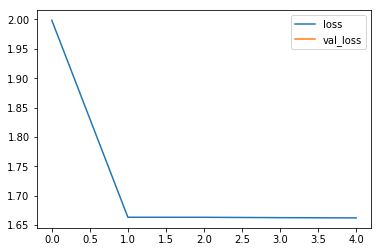

Epoch 6/50
 900/1769 [==============>...............] - ETA: 3:10 - loss: 1.6872 - acc: 0.2467

KeyboardInterrupt: 

In [4]:
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16

num_classes = 6
img_rows = 128
img_cols = 128

#train_indices=n_images-1
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.30)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)

input_shape = (img_rows, img_cols, 1)

model = VGG16(weights=None, include_top=True, input_shape=input_shape,classes=num_classes)

model.summary()
#plot_model(model, to_file='model.png', show_shapes=True)
#optim = SGD(lr=10e-3,momentum=0.0, decay=0.0, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

BATCH_SIZE=100
EPOCHS= 50

# Train the model
history=model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, callbacks=[plot_losses])
